# House Price Index: Brisbane, Sydney and Melbourne, 2002-03 to 2017-18
- Data Source 
  - [House price](https://data.qld.gov.au/dataset/house-price-index-bris-syd-melb/resource/4563663c-fcc1-44d2-b9f0-27b6d922c914)
  - [Home loan interest rate](http://www.loansense.com.au/historical-rates.html)
- Remark on Data 
  - House price
      - Established houses.
      - Base of each index: 2011-12 = 100.
      - Average four quarters for Financial Year
  - Home loan interest rate

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# import seaborn as sns
import datetime

# Data Cleansing and Transformation
- Read Source as byte 
- Replace byte 'x96' with '-'
- Replace 'n.a.' to ''
- Only process data start with Financial year

In [2]:
data_raw = '../data/raw/house-price-index-bris-syd-melb.csv'
data_processed = '../data/processed/house-price-index-bris-syd-melb.csv'
data_pattern = re.compile('^[0-9]{4}-[0-9]{2}')
data_header = 'Financial year,Brisbane-Index,Brisbane-Annual Change,Sydney-Index,Sydney-Annual Change,Melbourne-Index,Melbourne-Annual Change\n'
with open(data_raw, 'rb') as f_raw:
    with open(data_processed, 'w') as f_processed:
        f_processed.write(data_header)
        for each in f_raw:
            line = each.decode(encoding='UTF-8', errors='backslashreplace').replace('\\x96', '-').replace('n.a.', '')
            if re.match(data_pattern, line):
                f_processed.write(line)

In [3]:
house_prices_data = pd.read_csv(data_processed, index_col='Financial year')

In [29]:
data_raw = '../data/raw/standard-variable-home-loan-interest-rates-australia.csv'

def financial_year(date_str):
    date = datetime.date(int(date_str[0:4]), int(date_str[5:7]), int(date_str[9:11]))
    if date.month >= 7:
        year = date.year
    else:
        year = date.year - 1
        
    return str(year) + '-' + str(year + 1)[2:4]

home_loan_interest_rate = pd.read_csv(data_raw, index_col='MONTH-YEAR')
home_loan_interest_rate['Financial Year'] = home_loan_interest_rate.index
home_loan_interest_rate['Financial Year'] = home_loan_interest_rate['Financial Year'].apply(financial_year)
home_loan_interest_rate.set_index('Financial Year')
home_loan_interest_rate_avg_financial_year = home_loan_interest_rate.groupby(['Financial Year']).mean()

# Data Description

In [5]:
house_prices_data

,Brisbane-Index,Brisbane-Annual Change,Sydney-Index,Sydney-Annual Change,Melbourne-Index,Melbourne-Annual Change
Financial year,,,,,,
2002-03,52.6,NaN,78.2,NaN,54.1,NaN
2003-04,69.7,32.5,87.5,11.9,60.1,11.2
2004-05,72.6,4.2,84.1,-3.9,61.2,1.8
2005-06,75.4,3.9,81.6,-3.0,63.9,4.4
2006-07,83.1,10.2,83.6,2.5,70.4,10.2
2007-08,98.8,18.9,89.1,6.6,84.1,19.5
2008-09,97.4,-1.4,85.8,-3.7,83.5,-0.7
2009-10,105.7,8.5,97.8,14.0,100.2,20.0
2010-11,104.6,-1.0,102.2,4.5,104.8,4.6


In [30]:
home_loan_interest_rate_avg_financial_year

,RATE
Financial Year,
1958-59,5.000000
1959-60,5.000000
1960-61,5.250000
1961-62,5.500000
1962-63,5.375000
1963-64,5.010833
1964-65,5.192500
1965-66,5.380000
1966-67,5.380000


In [34]:
result = house_prices_data.join(home_loan_interest_rate_avg_financial_year, how='left')

In [35]:
result

,Brisbane-Index,Brisbane-Annual Change,Sydney-Index,Sydney-Annual Change,Melbourne-Index,Melbourne-Annual Change,RATE
Financial year,,,,,,,
2002-03,52.6,NaN,78.2,NaN,54.1,NaN,6.550000
2003-04,69.7,32.5,87.5,11.9,60.1,11.2,6.862500
2004-05,72.6,4.2,84.1,-3.9,61.2,1.8,7.133333
2005-06,75.4,3.9,81.6,-3.0,63.9,4.4,7.300000
2006-07,83.1,10.2,83.6,2.5,70.4,10.2,7.737500
2007-08,98.8,18.9,89.1,6.6,84.1,19.5,8.329167
2008-09,97.4,-1.4,85.8,-3.7,83.5,-0.7,8.352500
2009-10,105.7,8.5,97.8,14.0,100.2,20.0,6.085385
2010-11,104.6,-1.0,102.2,4.5,104.8,4.6,7.581818


# Visualization

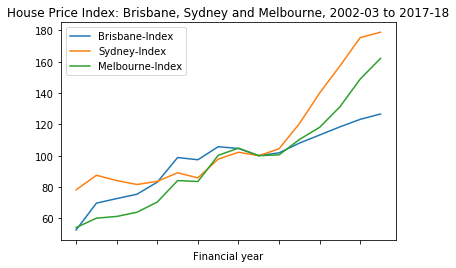

In [43]:
house_prices_data[['Brisbane-Index', 'Sydney-Index', 'Melbourne-Index']].plot(kind='line', rot=45, title='House Price Index: Brisbane, Sydney and Melbourne, 2002-03 to 2017-18') 

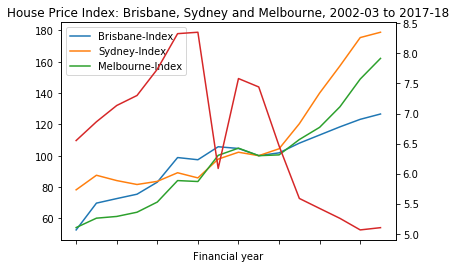

In [44]:
ax = result[['Brisbane-Index', 'Sydney-Index', 'Melbourne-Index']].plot(kind='line') 
result['RATE'].plot(kind='line', x='RATE', secondary_y=True, ax=ax, rot=45, title='House Price Index: Brisbane, Sydney and Melbourne, 2002-03 to 2017-18')

# Summary
- All three cities housing prices dropped in Financial year 2008-2009 and 2011-12.
  - 2008-09 is due to the Global Financial Crisis
  - 2011-12 is likely due to the RBA’s November and December rate cuts
